# 2DoF inverse kinematics
3自由度マニピュレータの順運動学です。

## Denavit-Hartenberg parameters

|$^{i-1}T_i$|$a_i$|$\alpha_i$|$d_i$|$\theta_i$|
|---|---|---|---|---|
|$^{B}T_1$  |0    |0         |0    |$\theta_1$|
|$^{1}T_2$  |1    |0         |0    |$\theta_2$|
|$^{2}T_E$  |1    |0         |0    |0         |

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Homogeneous transformation matrix
# 同次変換行列
def trans_m(a, alpha, d, theta):
    m = np.array([[np.cos(theta), -np.sin(theta), 0., a],
                  [np.cos(alpha)*np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha), -np.sin(alpha)*d],
                  [np.sin(alpha)*np.sin(theta), np.sin(alpha)*np.cos(theta),  np.cos(alpha),  np.cos(alpha)*d],
                  [0., 0., 0., 1.]])
    return m

In [3]:
# Forward kinematics
# 順運動学
def fk(theta):
    tm0_1 = trans_m(0., 0., 0., theta[0,0])
    tm1_2 = trans_m(1., 0., 0., theta[1,0])
    tm2_3 = trans_m(1., 0., 0., 0.)
    pos = [tm0_1[0:2,3:4],
           tm0_1.dot(tm1_2)[0:2,3:4],
           tm0_1.dot(tm1_2).dot(tm2_3)[0:2,3:4]]
    return pos

## ヤコビ行列
まず関節角ベクトル$q$, 手先位置ベクトル$r$を下記のように定義します。

$$
\begin{align*}
q&=\begin{bmatrix} \theta _{1} \\ \theta _{2} \end{bmatrix}\\
r&=\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{align*}
$$

するとヤコビ行列は下記のように定義されます。

$$
J\left( q\right) =\begin{bmatrix} \dfrac {\partial x}{\partial \theta _{1}} & \dfrac {\partial x}{\partial \theta _{2}} \\ \dfrac {\partial y}{\partial \theta _{1}} & \dfrac {\partial y}{\partial \theta _{2}} \end{bmatrix}
$$

ヤコビ行列の各要素は下記の通りです。

$$
J_{ij}=\dfrac {\partial r_i}{\partial q_j}
$$

In [4]:
# Jacobian matrix
# ヤコビ行列
def J(theta):
    e = 1.0e-10
    diff_q1 = (fk(theta+np.array([[e],[0.]]))[2]-fk(theta)[2])/e
    diff_q2 = (fk(theta+np.array([[0.],[e]]))[2]-fk(theta)[2])/e
    return np.hstack((diff_q1, diff_q2))

In [5]:
# マニピュレータの描画
def draw(r, q):
    xs = [e[0] for e in r]
    ys = [e[1] for e in r]
    
    fig = plt.figure(figsize=(5,5))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-2,2)
    sp.set_ylim(-2,2)
    plt.plot(xs, ys, "-", color="skyblue", lw=5, label="link")
    plt.plot(xs, ys, "o", color="orange", ms=10, label="joint")
    plt.grid()
    plt.legend(fontsize=10)
    plt.show()
    
    print("r: "+str(r[2].T))
    print("q: "+str(q.T))

## 数値計算
初期値$q_0$を設定し、下式を繰り返し計算します。
$$
\begin{align*}
r_i&=f(q_i)\\
q_{i+1}&=q_i-J(q_i)^{-1}(r_i-r_{ref})
\end{align*}
$$

In [6]:
# 初期関節角
q = np.array([[np.pi/6],
              [np.pi/2]])

# 目標手先位置
r_ref = np.array([[1.5],
                  [1.]])

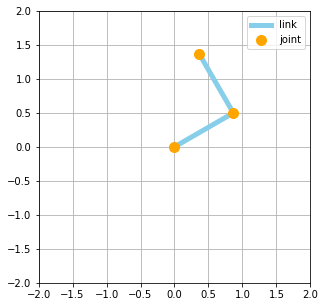

r: [[0.3660254 1.3660254]]
q: [[0.52359878 1.57079633]]


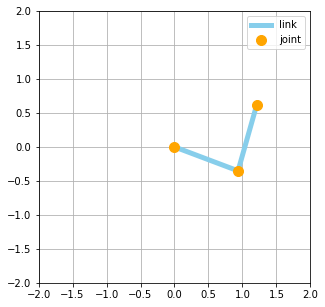

r: [[1.2077327  0.60968082]]
q: [[-0.36037529  1.65573394]]


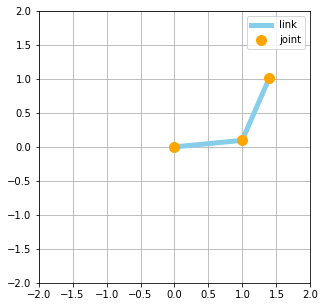

r: [[1.3956074  1.01262412]]
q: [[0.0963659  1.06264407]]


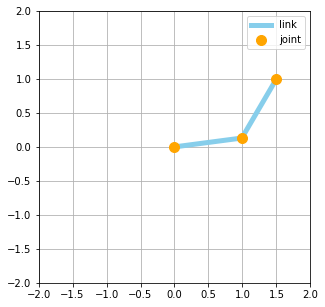

r: [[1.49639565 0.99372035]]
q: [[0.13094999 0.91051377]]


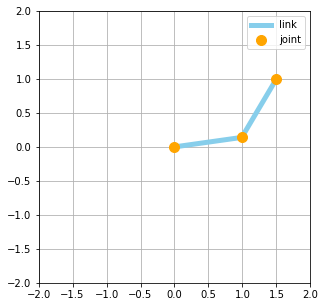

r: [[1.49995051 0.99998103]]
q: [[0.14011699 0.89578417]]


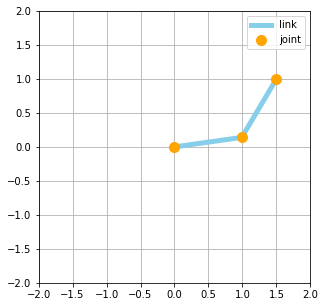

r: [[1.5 1. ]]
q: [[0.1401702 0.8956648]]


In [7]:
# 数値計算
for i in range(5):
    r = fk(q)
    draw(r, q)
    q = q - np.linalg.inv(J(q)).dot((r[2] - r_ref))

r = fk(q)
draw(r, q)